In [9]:
# hog feature extractor

import cv2
import numpy as np
import os
import torchvision.transforms as transforms
import keras.utils as image

# parameters for 

class hogmodel():
    def __init__(self):
        self.winSize = (64, 64)
        blockSize = (16, 16)
        blockStride = (8, 8)
        cellSize = (8, 8)
        nbins = 9
        
        self.hog = cv2.HOGDescriptor(self.winSize, blockSize, blockStride, cellSize, nbins)

    def features(self, img):
        img = cv2.resize(img, self.winSize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Compute the HOG features
        features = self.hog.compute(gray)        
        return features
hog = hogmodel()




In [10]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

folder = 'dataset-v2'

images = load_images_from_folder(folder=folder)
features_hog = []

for img in images:
    f = hog.features(img)
    # print(f)
    # print(f.numpy())
    features_hog.append(f.flatten())
    
print(features_hog[0], features_hog[0])

print(len(features_hog[0]))
print(np.array(features_hog).shape)

[0.1309936  0.05487607 0.0361949  ... 0.26525983 0.26525983 0.26525983] [0.1309936  0.05487607 0.0361949  ... 0.26525983 0.26525983 0.26525983]
1764
(831, 1764)


(831, 1764)


C:\Users\rawal\AppData\Local\Temp\ipykernel_26208\2142185300.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


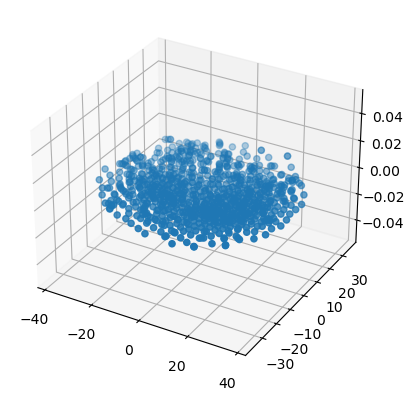

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


features = np.array(features_hog)
print(features.shape)
tsne = TSNE(n_components=2, perplexity=10, learning_rate=350, n_iter=5000, random_state=0).fit_transform(features)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(tsne[:, 0], tsne[:, 1])
# plt.scatter3D(tsne[:, 0], tsne[:, 1],tsne[:,2])
fig.show()

In [12]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))


0 -1gyxuGDs1U.png
1 -4zrvLIvs4c.png
2 -AkTLfreP2M.png
3 -c0e7821tHs.png
4 -fDVHJoZArg.png
5 -Jl2Hc2DTKc.png
6 -ldA6PCa1kM.png
7 -LqbAMHGMTk.png
8 -nd7n0gqAmI.png
9 -O9qlFkYMPg.png
10 -QTo3nfmWUc.png
11 -S4CwK5Z5Xg.png
12 -T-nJ2Wpw7k.png
13 -TfgtjrXCHk.png
14 -Xb6JoucBXM.png
15 -xBAM1TRSKA.png
16 -xl0Com4ElM.png
17 -ZgukO7zXPw.png
18 -_I4hECDZ_E.png
19 0573pkeSWeE.png
20 0BT0wtCFg7g.png
21 0DEeNLbFuRc.png
22 0DPwPc0_D4Y.png
23 0fo8z8AYY8I.png
24 0nLoRgi1f78.png
25 0Nnu3YnYvxQ.png
26 0nsgnqskJHY.png
27 0NXvJ2rLmbo.png
28 0PJeUvSlH0Y.png
29 0VIlQrx-MJA.png
30 0vzkrpTuBC8.png
31 0Y5YY0qC76A.png
32 0ZsSCFAJUvQ.png
33 1-heRW4pZGE.png
34 17kOSu0fhD8.png
35 1atCTSRJHH0.png
36 1h1n6uOZCQM.png
37 1ILEFmneqJA.png
38 1jdee9lHNiU.png
39 1Kk_etwM2RY.png
40 1KoQPLMR_ws.png
41 1kzAID_adzY.png
42 1N7L1njglgY.png
43 1p0zaHCyYyg.png
44 1PLZBbrLJKA.png
45 1S-YJI2YB1s.png
46 1uLDWf6jM-c.png
47 1zUvUDCkPE8.png
48 23b-uwda5tQ.png
49 24kZ0uGGM48.png
50 28hxSU4mxbw.png
51 29w88_gzf9Q.png
52 2Ahhjo0Knm0.png
53 

C:\Users\rawal\AppData\Local\Temp\ipykernel_26208\2472547274.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


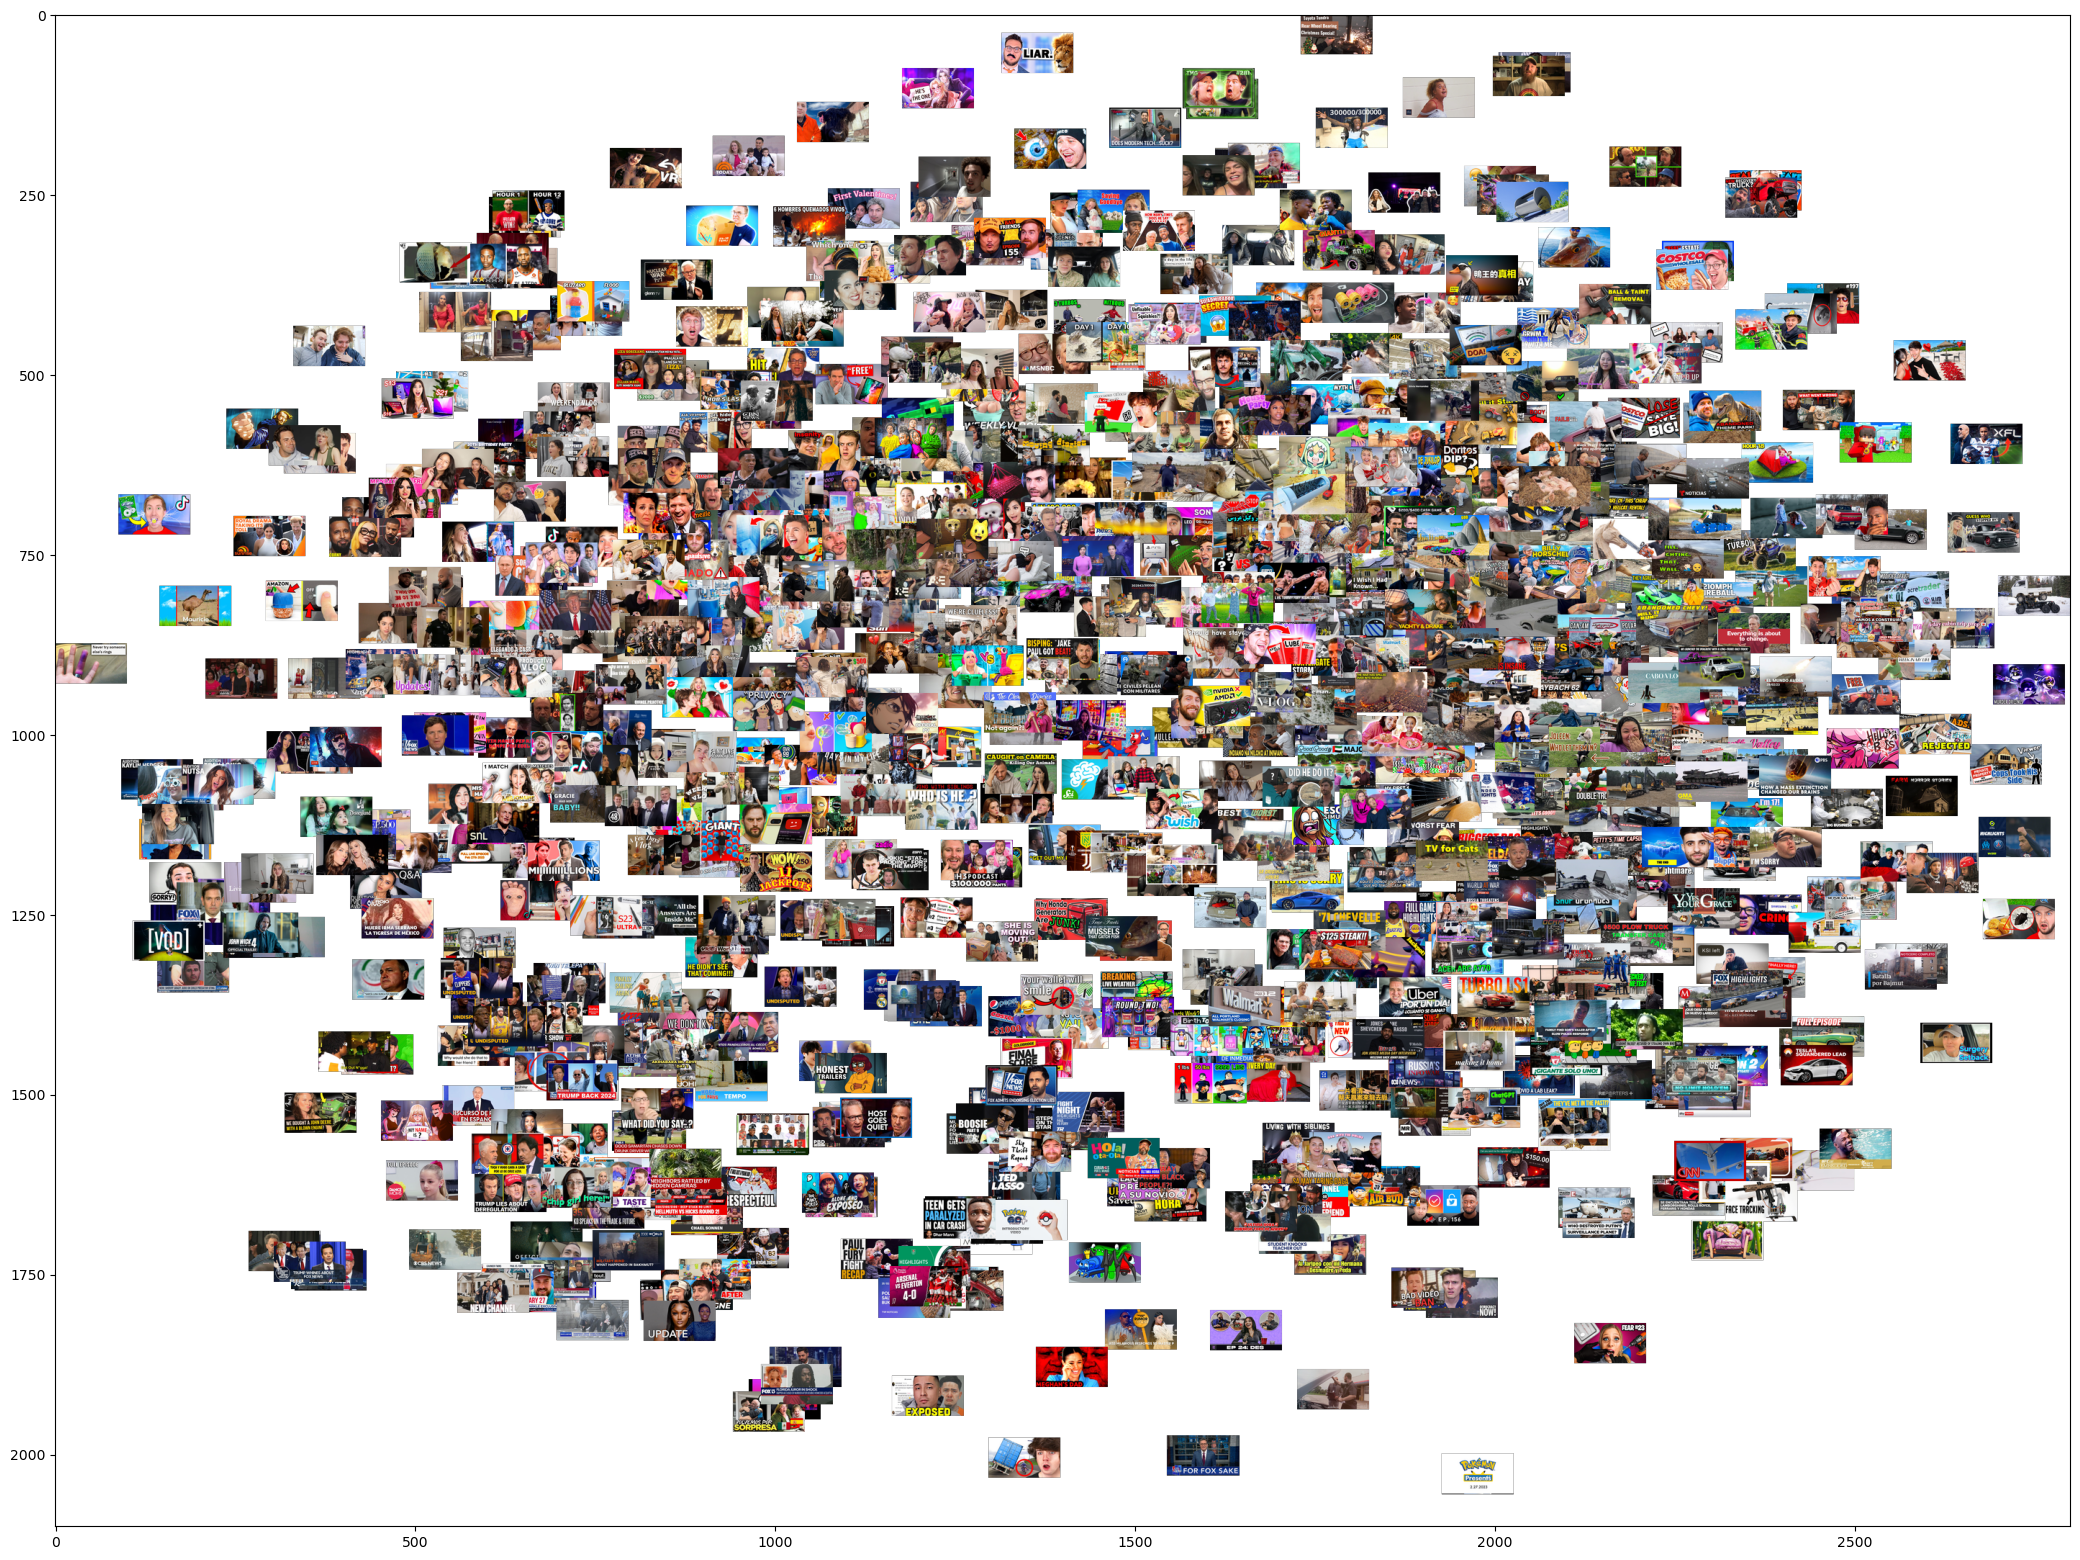

In [13]:
r = 0.7
from PIL import Image

width = int(4000*r)
height = int(3000*r)
max_dim = 100
images = []
for i, filename  in enumerate(os.listdir('dataset-v2')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset-v2\\'+filename)
    images.append(img)
full_image = Image.new('RGBA', (width, height))


for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (26,26))
plt.imshow(full_image)

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

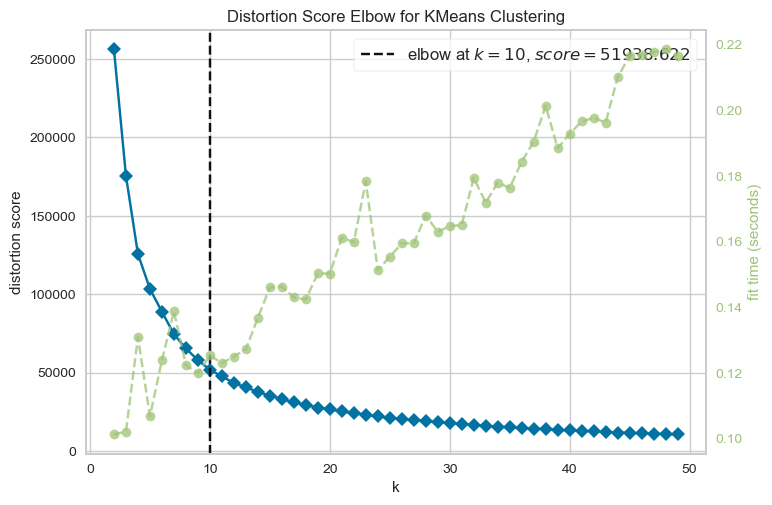

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,50))
visualizer.fit(tsne)
visualizer.show()

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


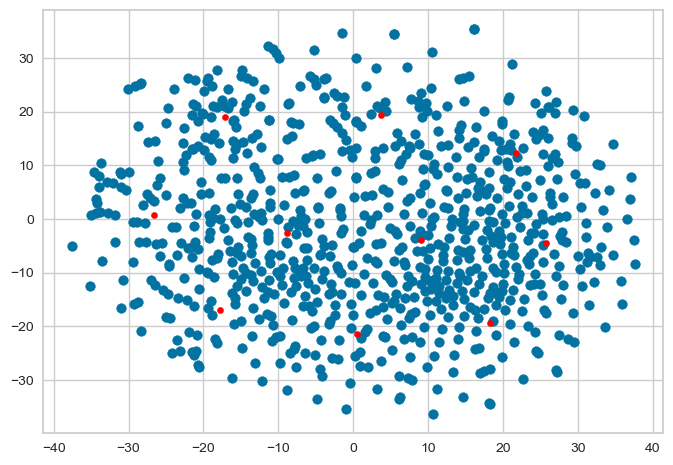

In [15]:
kmeans = KMeans(n_clusters=10,random_state=0).fit(tsne)
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()


In [16]:
import pandas as pd
data = []
labels = kmeans.labels_
for i in range(0,len(tsne)):
    x = tsne[i][0]
    y = tsne[i][1]
    pred = labels[i]
    data.append(
        {
            'X' : x,
            'Y' : y,
            'Cluster' : pred
        }
    )
# print(data)
df = pd.DataFrame(data)
df.head(10)

X          Y  Cluster
0  19.975555 -12.108553        7
1   4.916268  -1.779041        9
2 -16.016766  18.318602        3
3  14.426663  17.550440        1
4  14.687419   1.000632        9
5 -15.049914 -19.081532        0
6  -4.468263  -6.711725        5
7  -4.864508   7.694069        5
8  16.476427   4.248847        1
9  21.896566   0.391786        4

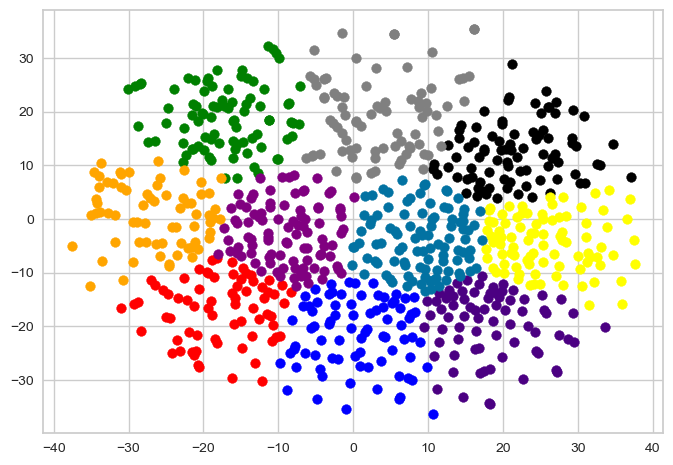

In [17]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label_0 = df.loc[df['Cluster'] == 0]
filtered_label_1 = df.loc[df['Cluster'] == 1]
filtered_label_2 = df.loc[df['Cluster'] == 2]
filtered_label_3 = df.loc[df['Cluster'] == 3]
filtered_label_4 = df.loc[df['Cluster'] == 4]
filtered_label_5 = df.loc[df['Cluster'] == 5]
filtered_label_6 = df.loc[df['Cluster'] == 6]
filtered_label_7 = df.loc[df['Cluster'] == 7]
filtered_label_8 = df.loc[df['Cluster'] == 8]
filtered_label_9 = df.loc[df['Cluster'] == 9]

# filtered_label_0.head(10)
#plotting the results
plt.scatter(filtered_label_0['X'] , filtered_label_0['Y'], color ='red')
plt.scatter(filtered_label_1['X'] , filtered_label_1['Y'], color ='black')
plt.scatter(filtered_label_2['X'] , filtered_label_2['Y'], color ='blue')
plt.scatter(filtered_label_3['X'] , filtered_label_3['Y'], color ='green')
plt.scatter(filtered_label_4['X'] , filtered_label_4['Y'], color ='yellow')
plt.scatter(filtered_label_5['X'] , filtered_label_5['Y'], color ='purple')
plt.scatter(filtered_label_6['X'] , filtered_label_6['Y'], color ='orange')
plt.scatter(filtered_label_7['X'] , filtered_label_7['Y'], color ='indigo')
plt.scatter(filtered_label_8['X'] , filtered_label_8['Y'], color ='gray')
plt.scatter(filtered_label_9['X'] , filtered_label_9['Y'])
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, cohen_kappa_score, calinski_harabasz_score, davies_bouldin_score
print(davies_bouldin_score(tsne, kmeans.labels_))
print(calinski_harabasz_score(tsne, kmeans.labels_))
print(silhouette_score(tsne, kmeans.labels_))

0.8205648884155989
698.6091971763414
0.3416783
